#About the dataset and the task:
##This dataset consists of xx images of flowers which belong to 102 categories of flowers. With the use of the Tensorflow library and the Neural Network we try to creat a model to predict the class of a flower based on the image.

In [1]:
#First we load the libraries need
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
#Load the dataset from the tensorflow_datasets library with the info
#I also split the data and load the train, test and validation data seperatly
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
training, testing, validation = dataset['train'], dataset['test'], dataset['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete0SPQDF/oxford_flowers102-train.tfrecord*…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete0SPQDF/oxford_flowers102-test.tfrecord*.…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete0SPQDF/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [5]:
#here we can see the classes in our data which is the kind of flowers in our dataset which as can be seen are 5 different flowers
classes = info.features['label'].names
print("Name of the flower categories: " ,classes)

Name of the flower categories:  ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dah

In [18]:
#I write this code to get all the images and labels in two lists for data vizualization and further inspection of the data
images =[]
labels= []
for example, label in training:
    images.append(example)
    labels.append(label)
for example, label in testing:
    images.append(example)
    labels.append(label)
for example, label in validation:
    images.append(example)
    labels.append(label)
labels=np.array(labels)

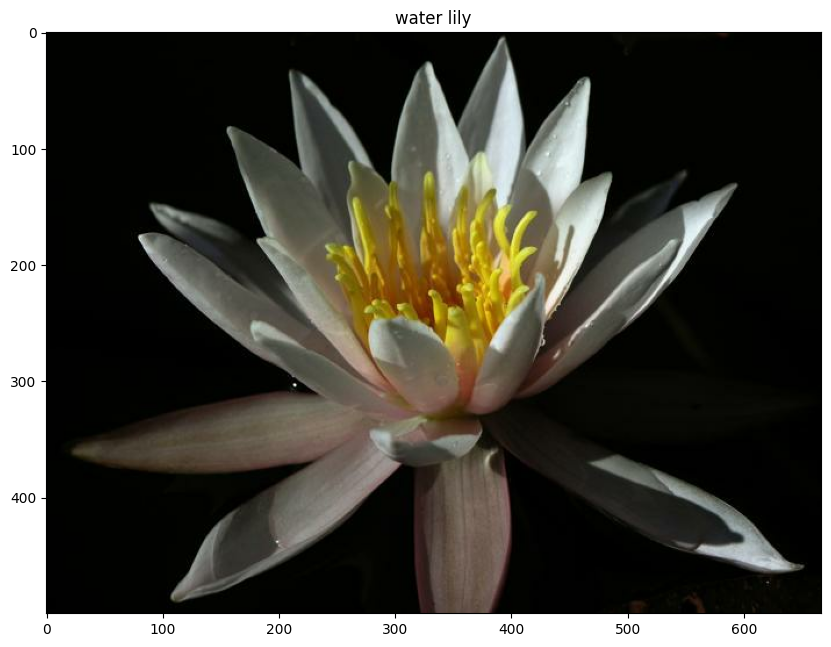

72


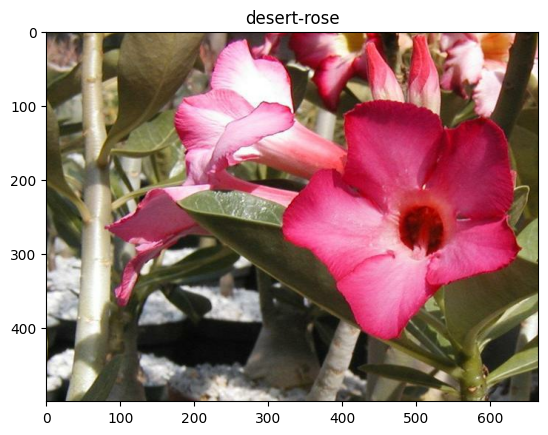

84


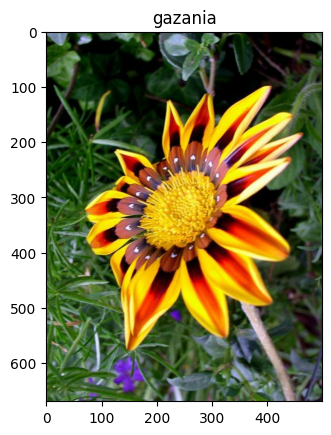

70


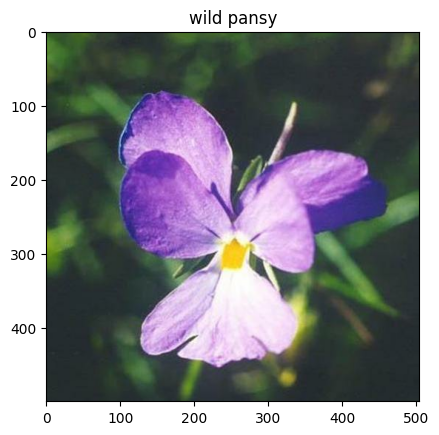

51


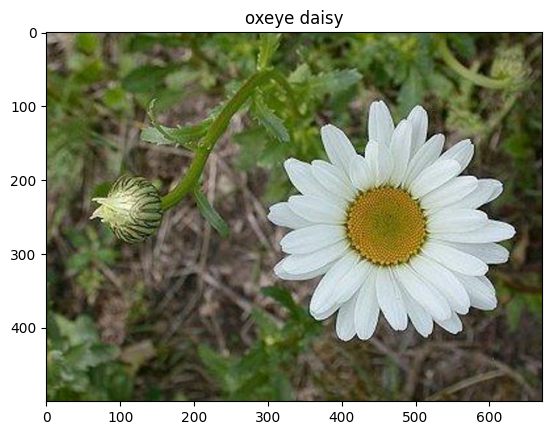

48


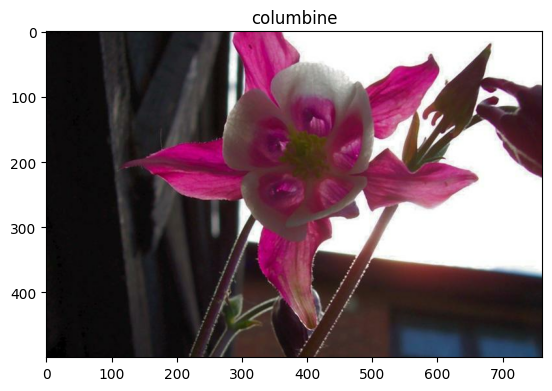

83


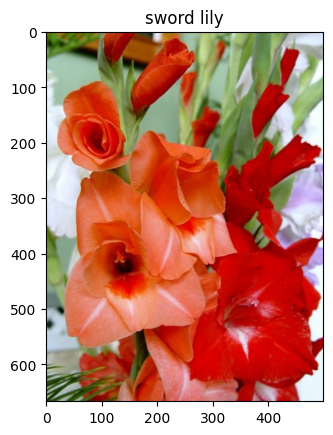

42


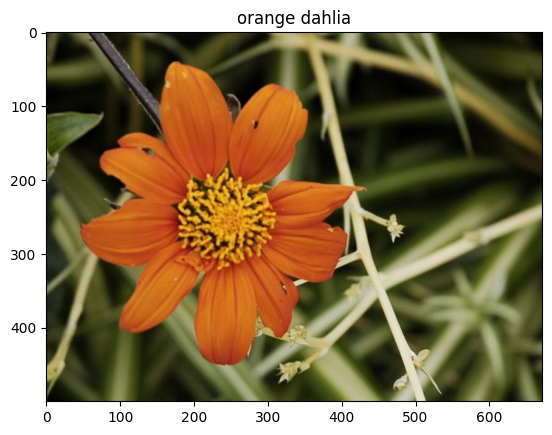

58


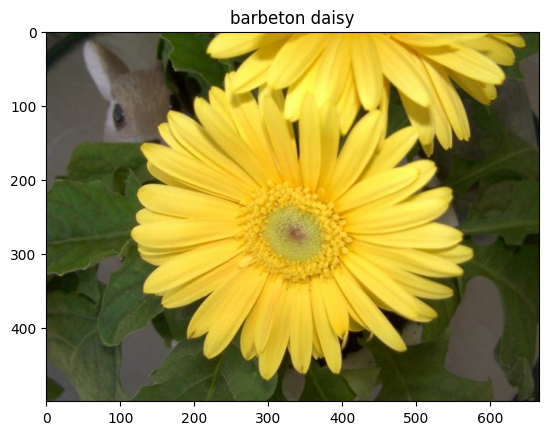

40


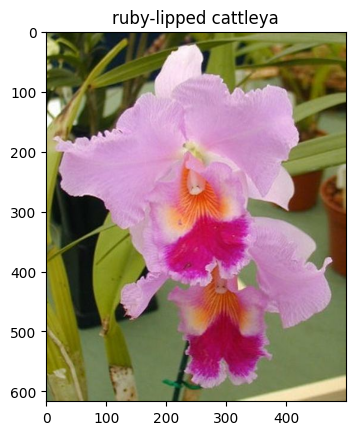

35


In [19]:
plt.figure(figsize=(10, 10))
for i in range (10):
  img=images[i]
  label=labels[i]
  plt.imshow(img)
  plt.title(classes[labels[i]])
  plt.show()
  print(label)

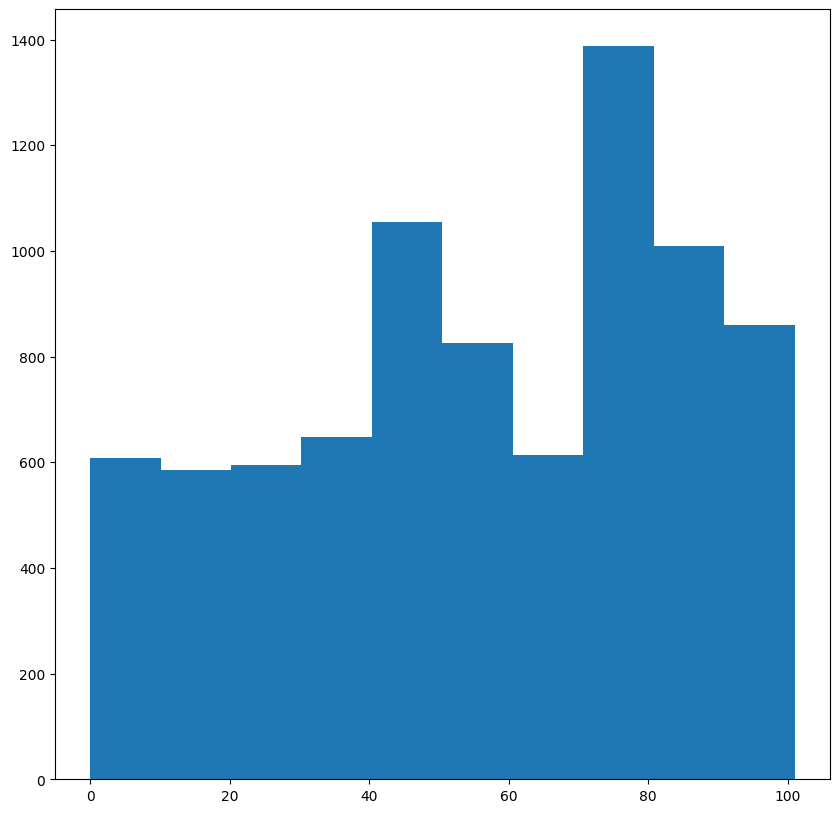

In [31]:
#This code will vizualise the spread of data amongst the labels
plt.figure(figsize=(10, 10))
plt.hist(labels);

In [20]:
#We write the "resize" function to turn all the pixels between 0 and one an dturn the images to the appropriat size to make it easier for processing
def resize(image, label):
    image = tf.image.resize(image, (224, 224))/255.0
    return image, label

In [21]:
train = training.map(resize).batch(32).prefetch(1)
valid = validation.map(resize).batch(32).prefetch(1)
test = testing.map(resize).batch(32).prefetch(1)

In [ ]:
#For the model I am using a pretrained model wieghts from keras hub
pretrained = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/5", input_shape=(224, 224, 3))
pretrained.trainable = False
model = tf.keras.Sequential([
  pretrained,
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(102)
])

In [23]:
#This code will call for a earlystopping of the iteration when the accuracy of the validation doesn't imporve for over ten epoch
es= tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10, mode='max')

In [27]:
model.compile(optimizer= 'Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history= model.fit(train, epochs=50, batch_size=32, validation_data= valid, callbacks=[es])

Epoch 1/50
32/32 [==============================] - 128s 4s/step - loss: 3.9561 - accuracy: 0.1157 - val_loss: 3.6022 - val_accuracy: 0.2451
Epoch 2/50
32/32 [==============================] - 85s 3s/step - loss: 3.2741 - accuracy: 0.2765 - val_loss: 3.0793 - val_accuracy: 0.4069
Epoch 3/50
32/32 [==============================] - 85s 3s/step - loss: 2.7822 - accuracy: 0.4069 - val_loss: 2.6551 - val_accuracy: 0.4922
Epoch 4/50
32/32 [==============================] - 86s 3s/step - loss: 2.3399 - accuracy: 0.4971 - val_loss: 2.2902 - val_accuracy: 0.5657
Epoch 5/50
32/32 [==============================] - 125s 4s/step - loss: 1.9679 - accuracy: 0.5853 - val_loss: 1.9898 - val_accuracy: 0.6235
Epoch 6/50
32/32 [==============================] - 136s 4s/step - loss: 1.6429 - accuracy: 0.6696 - val_loss: 1.7506 - val_accuracy: 0.6618
Epoch 7/50
32/32 [==============================] - 87s 3s/step - loss: 1.4269 - accuracy: 0.7010 - val_loss: 1.5550 - val_accuracy: 0.6951
Epoch 8/50
32/32 

In [28]:
model.evaluate(test)

193/193 [==============================] - 261s 1s/step - loss: 0.7114 - accuracy: 0.8162


[0.71136873960495, 0.816230297088623]

1/1 [==============================] - 2s 2s/step


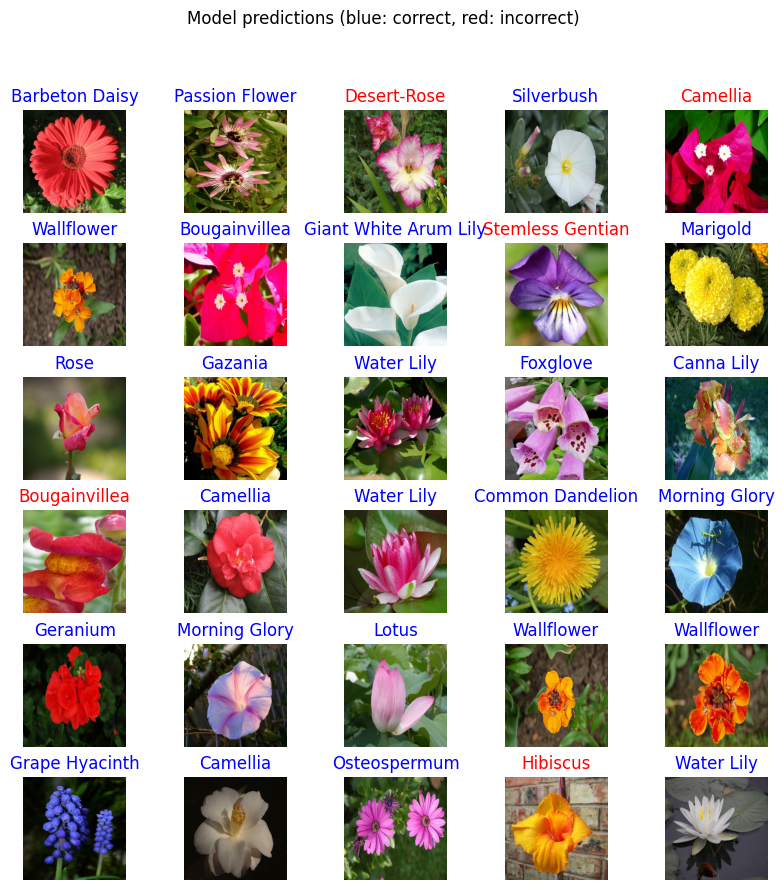

In [29]:
#With this code we can see which images the model got right and on what images it made mistake
#All these images are from the holdout test set
#If the model's prediction is correct then the label will apear blue and if the model has made a mistake regarding the image then the label will be red
image_batch, label_batch = next(iter(test))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = classes[predicted_ids]
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

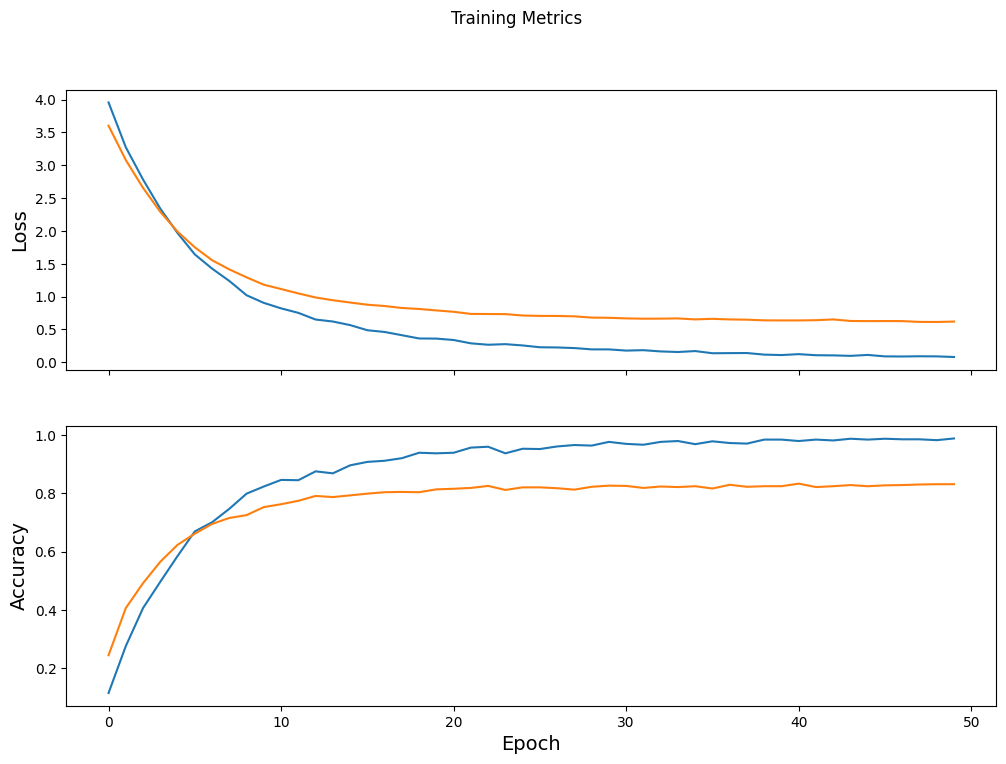

In [30]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')
history_dict = history.history
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(history_dict['loss'])
axes[0].plot(history_dict['val_loss'])

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(history_dict['accuracy'])
axes[1].plot(history_dict['val_accuracy'])
plt.show()